In [5]:
#Author: Avikal Somvanshi
import numpy as np


Lab Part One:

In [6]:
#Generating a two set of random numbers 
rand_array = np.random.rand(2,30)
rand_array

array([[ 0.25333128,  0.41722693,  0.93768706,  0.5394949 ,  0.12981035,
         0.56884937,  0.91171545,  0.92620908,  0.67811469,  0.07838572,
         0.1996545 ,  0.54899638,  0.67964312,  0.04497327,  0.84362632,
         0.63327979,  0.81540849,  0.64715912,  0.81223743,  0.65572247,
         0.13690295,  0.53309475,  0.87710536,  0.40693956,  0.60429326,
         0.55326601,  0.25777064,  0.5662588 ,  0.3571933 ,  0.74994606],
       [ 0.56102966,  0.73865402,  0.50806539,  0.35608018,  0.29194568,
         0.77201674,  0.37147406,  0.75037647,  0.84516902,  0.06370573,
         0.73732057,  0.83760575,  0.47772343,  0.23493479,  0.30181473,
         0.56039366,  0.79715552,  0.53859157,  0.55386526,  0.49939814,
         0.38305424,  0.70830169,  0.56766262,  0.9654455 ,  0.74575321,
         0.23821509,  0.45715054,  0.99904406,  0.05822982,  0.21095966]])

Populating the interactive namespace from numpy and matplotlib


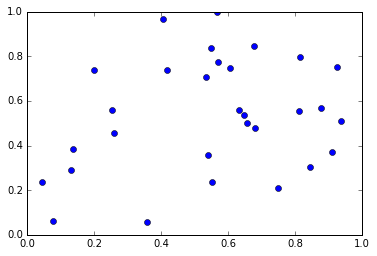

In [7]:
#Ploting the random distribution
import matplotlib.pyplot as pl
%pylab inline

pl.plot(rand_array[0], rand_array[1], 'o')
pl.show()

(array([ 0.00583654,  0.01750962,  0.1050577 ,  0.19260579,  0.36186542,
         0.42606735,  0.23346156,  0.25097118,  0.11089424,  0.04669231]),
 array([-3.17800821, -2.6068935 , -2.03577879, -1.46466407, -0.89354936,
        -0.32243465,  0.24868006,  0.81979477,  1.39090949,  1.9620242 ,
         2.53313891]),
 <a list of 10 Patch objects>)

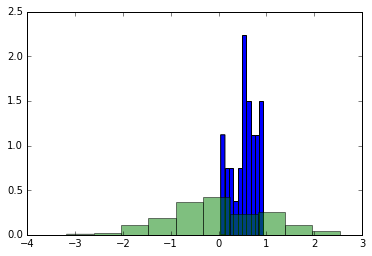

In [24]:
#Ploting a histogram
pl.hist(rand_array[0], bins =10, normed = 1)
pl.hist(np.random.randn(300), alpha = 0.5, bins =10, normed = 1)

Lab Part Two: Chi squared mean distribution 

101.594331944
[ 103.05450277   93.25283573   97.10120964  122.16858535  103.53326228
   98.0426551    95.37855903  107.46923232  109.75470395   82.64482702
   97.96347694  102.76348963   85.56259913   82.23872386  102.90276231
   94.52601659  109.20371663  123.69470716   91.88228418   97.42965791
  113.82450267   84.63469839  129.58487198   82.32221735  111.81970036
   89.1292885    76.41251478  104.4966456    93.25859044   83.85660471
   83.18185313  106.17929532  109.37156492   95.95925558  119.98985796
   93.96945944  127.07942986  106.02333636   96.61446217  103.52058898
  119.89197724   87.03683846   92.22340403   90.62599052   95.63390637
   91.60599596   73.09638988  101.90330347   89.4388901   129.44916215
  105.73943141  100.0203207    96.09713043  111.55597283   91.53970077
   95.53254785  120.65966469  107.85763833  112.9189801    83.11397741
  122.36326247  106.24478866  101.38770986  120.24728263  120.124779
   87.88499981   96.03324843  115.90922077  107.78006199   96.694

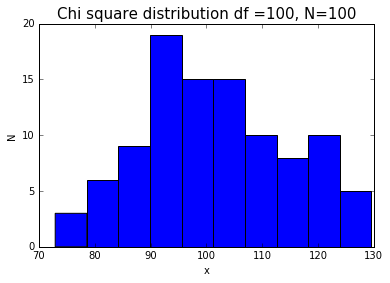

In [25]:
#Ploting histogram of randomly generated set of chi squared means
np.random.seed(229)
df = 100
def creat(df, siz):
    return np.random.chisquare(df, size = siz).mean()

chisq = np.random.chisquare(df, size = 100)
aw = np.mean(chisq)
print (aw)
print (chisq)
pl.hist(chisq)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi square distribution df =100, N=100', size = 15)

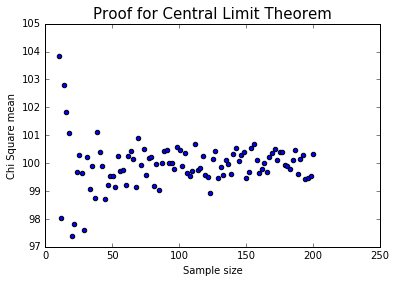

In [26]:
#Ploting the random samples to prove Central Limit Theorem

pl.figure()
pl.scatter(np.linspace(10,200,100), chisq_mean)
pl.ylabel('Chi Square mean')
pl.xlabel('Sample size')
pl.title('Proof for Central Limit Theorem', size = 15) 


#Lab Part Three: z-test

Idea: New bus route saves travel time compared to old bus route

Null Hypothesis: The average time taken by the new bus route is same or more than the average travel time taken by the old bus root. 

Ho : time_new.mean() >= time_old.mean()

Ha : time_new.mean() < time_old.mean()

Assumed alpha = 0.05

In [14]:
#Importing the bus route timing data

s = np.loadtxt('times.txt' , delimiter ='\n')
s

array([ 31.62223931,  32.82137636,  30.2291014 ,  31.41376587,
        39.01055035,  34.82207891,  39.87188366,  39.57994562,
        31.02658678,  27.66246068,  18.8752884 ,  46.2313731 ,
        30.01522604,  47.6004104 ,  16.52726666,  42.4462331 ,
        33.62527449,  42.28462558,  46.20520667,  30.87517392,
        32.94800341,  26.17691512,  31.25699649,  35.33644554,
        35.64072501,  40.32297174,  38.04348588,  29.4579793 ,
        23.91636367,  34.56403521,  45.42782464,  38.95607754,
        39.11396748,  39.67398759,  31.89148105,  22.62379325,
        26.18910408,  43.54114213,  33.2607386 ,  31.67602384,
        37.12846259,  38.22048496,  34.38814185,  36.11407371,
        44.08064814,  29.59917161,  37.02411751,  41.60576556,
        44.37860528,  38.06471077,  22.90526456,  40.27182857,
        31.57979239,  25.88037795,  28.8913048 ,  44.33687925,
        36.78948684,  43.46098875,  40.65557   ,  26.16634004,
        25.13884784,  33.01581456,  32.87050073,  26.28

In [28]:
time_new = np.mean(s)
time_new

34.466161688299998

In [31]:
# Given 36 as population mean (time_old), sample size (N) is 100, and standard deviation of the population is 6
z_score = (36 - time_new) / (6.0/10.0)
print 'The z_score is ', z_score

The z_score is  2.55639718617


Z Score interprtation: 2.56 is larger than 2, which means the old mean is more than two sigma away (assumed p-value) therefore NULL hypothesis doesn't hold and it can be rejected. 

Which means new bus route is faster than the old one.